In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
import rioxarray
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cf
import regionmask
from cmcrameri import cm
shp_pan = gpd.read_file(r'Data\shapefiles\panamz.geojson')
folder_metric = r'Data\Datasets\amz\map\clim'
stations = gpd.read_file(r'Data\Datasets\amz\map\stations.geojson')
regions = gpd.read_file(r'Data\shapefiles\ANA_amz.geojson', driver='GeoJSON')
regions_mask = regionmask.from_geopandas(regions, names='Region')
datasets_extras = ['cpc', 'cmap','cmorph', 'gpcp', 'persiann', 'ccs', 'cdr', 'mswep',
                    'mswep_nogauge', 'gldas','worldclim', 'era', 'ncep1', 'ncep2']

datasets_names_extras = ['CPC', 'CMAP','CMORPH', 'GPCP v3.2', 'PERSIANN', 'PERSIANN-CCS', 'PERSIANN-CDR', 'MSWEP v2.8',
                    'MSWEP_nogauge v2.8', 'GLDAS v2.1','WorldClim', 'ERA5', 'NCEP R1', 'NCEP R2']


from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 18})
regions_list = ['Western', 'Northern', 'Southern', 'Eastern']
regions_replace = { 0:'Southern', 1:'Eastern',2:'Western', 3:'Northern'}
letters_22 = ['j)', 'k)', 'l)', 'm)']


# CLIM

In [2]:
ds_dict = {}
for i, dataset in enumerate(datasets_extras):
    ds = xr.open_dataset(os.path.join(folder_metric, dataset + '.nc'))
    #create mask from regions
    mask = regions_mask.mask(ds, lon_name='lon', lat_name='lat')
    ds['Region'] = mask
    ds_dict[datasets_names_extras[i]] = ds
    

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: Sh

In [3]:
#create a df with all ds in ds_dict
df = pd.DataFrame()
for name in datasets_names_extras:
    dff =  ds_dict[name].to_dataframe().dropna().reset_index(drop=True)
    dff['Dataset'] = name
    df = df.append(dff)
df = df[['pr', 'Region', 'Dataset']]
df['Region'] = df['Region'].replace(regions_replace)
df_stat = stations[['Total', 'Region']].copy()
df_stat['Dataset'] = 'Stations'
df_stat = df_stat.rename(columns={'Total':'pr'})
df = df.append(df_stat)

C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\2516187761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)


C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\2516187761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\2516187761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\2516187761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\2516187761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\2516187761.py:6: FutureWarning: The frame.append method is dep

In [4]:
import matplotlib.colors as colors
vmin = 500
vmax = 3500
levels = 7
cmap =  cm.lapaz_r#cmocean.cm.rain#mpl.cm.Blues
extend_cbar = 'both'
var = 'pr'
var_stat = 'Total'
label_cbar = 'Mean Annual Precipitation (mm/year)'


C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\299961702.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


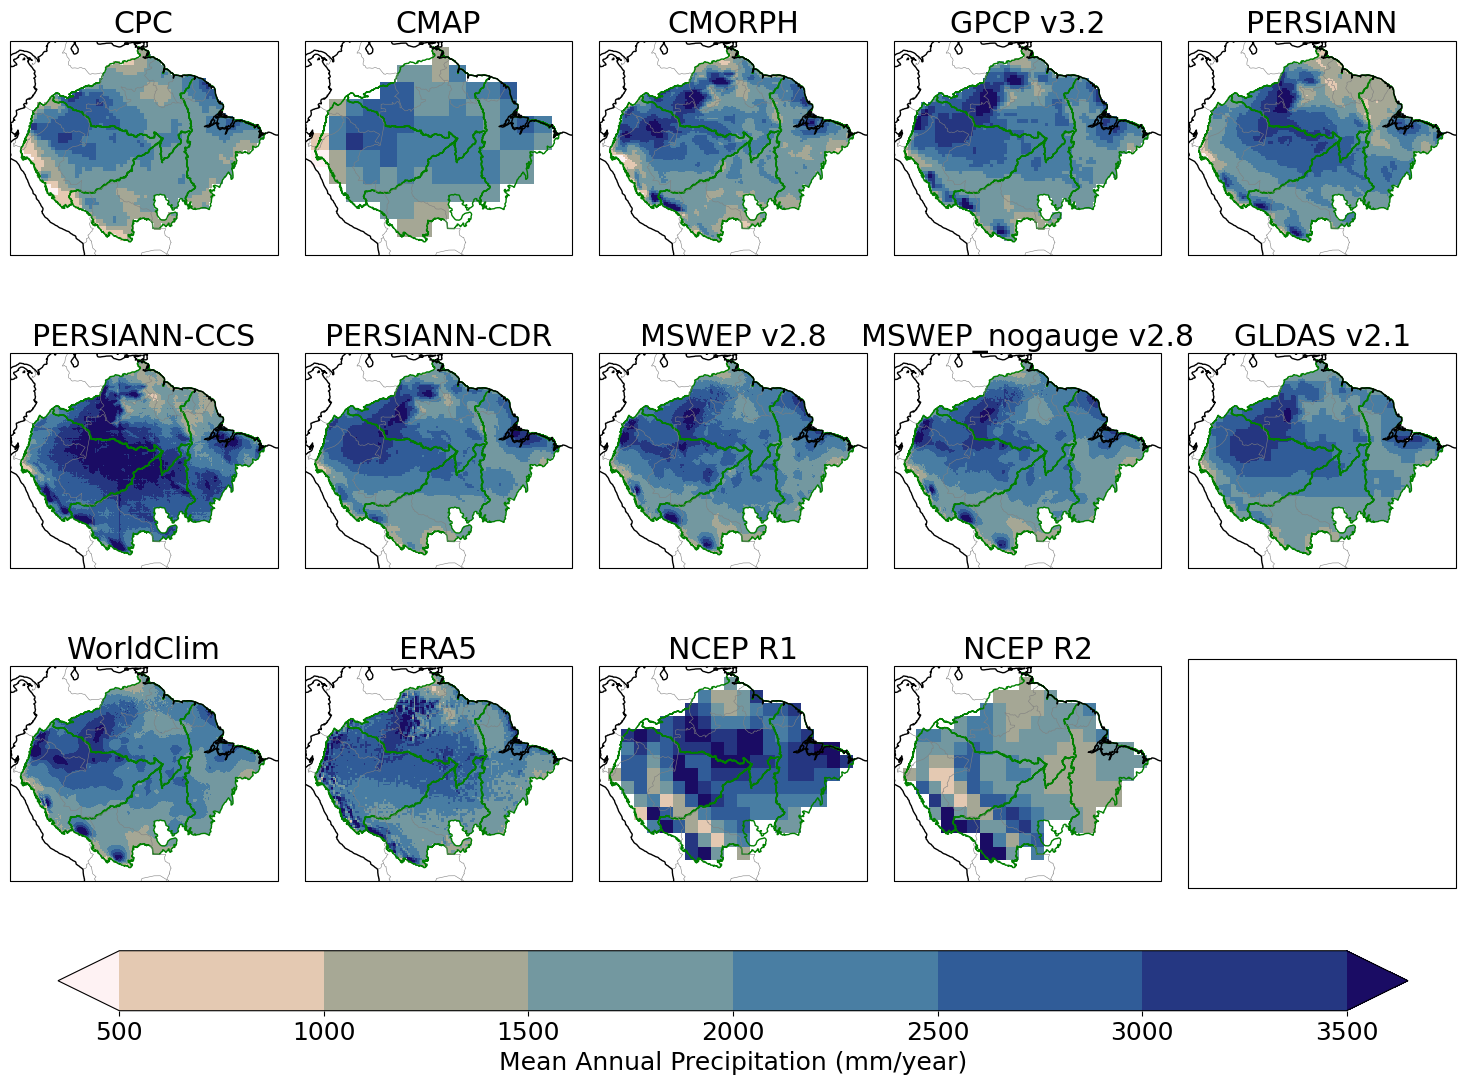

In [5]:
bounds = np.linspace(vmin, vmax, levels)
norm = colors.BoundaryNorm(bounds, cmap.N, extend=extend_cbar)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
extent=[-81, -42, -20, 11]
proj=ccrs.Mercator()

fig, axes = plt.subplots(3, 5, subplot_kw={'projection': proj},figsize=(15, 10))
axes = axes.flatten()
# Color bar
cax = fig.add_axes([0.05, -0.05, 0.9, 0.06])
fig.colorbar(sm, cax=cax, orientation='horizontal', label=label_cbar)

# Loop through the datasets and plot them
for i, name in enumerate(datasets_names_extras):
    ax = axes[i]
    ds = ds_dict[name][var]
    im = ds.plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), levels=levels, extend=extend_cbar)
    ax.add_geometries(regions.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=1)
    ax.add_feature(cf.BORDERS, edgecolor='grey', linewidth=0.4)
    axes[i].set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_title(name)

plt.tight_layout()
plt.show()

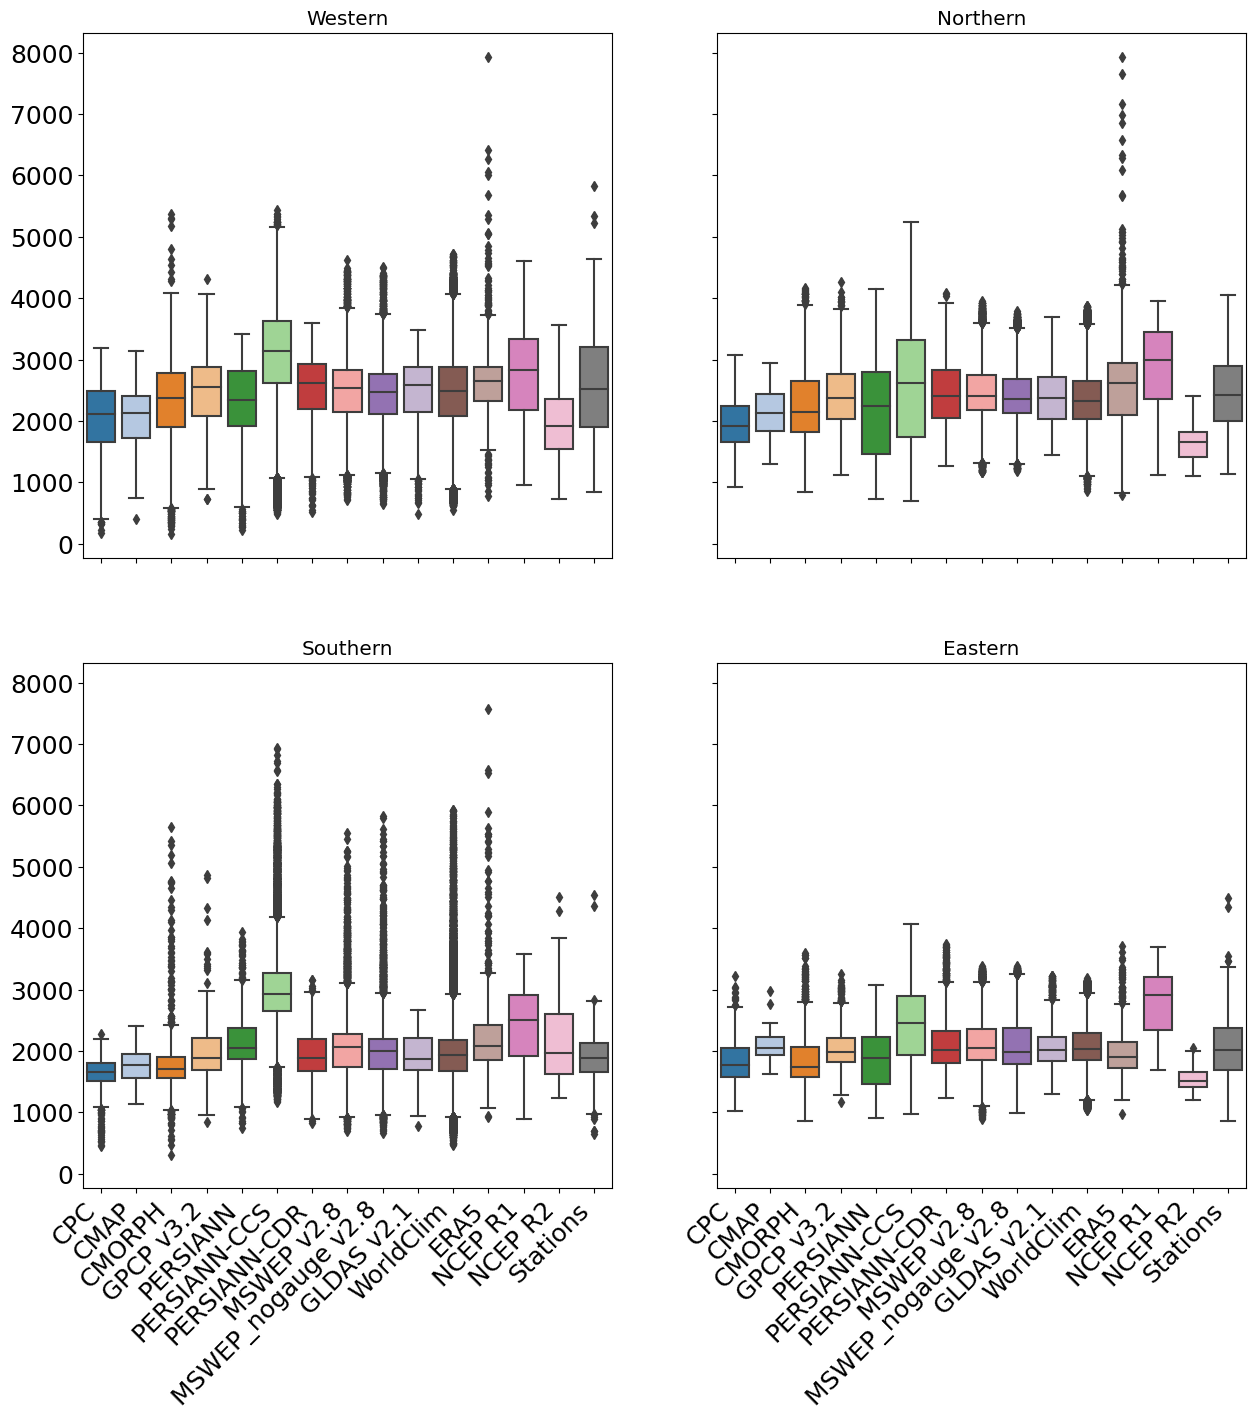

In [31]:
#plot boxplot for each region
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True, sharex=True)
axes = axes.flatten()
#set font size as 15
plt.rcParams.update({'font.size': 12})
for i, region in enumerate(regions_list):
    ax = axes[i]
    df_region = df[df['Region']==region]
    sns.boxplot(x="Dataset", y="pr", data=df_region, ax=ax, palette='tab20')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(region)

# TS

In [32]:
folder_metric = r'Data\Datasets\amz\map'
ds_dict = {}
for i, dataset in enumerate(datasets_extras):
    ds = xr.open_dataset(os.path.join(folder_metric, dataset + '.nc'))
    #create mask from regions
    mask = regions_mask.mask(ds, lon_name='lon', lat_name='lat')
    ds['Region'] = mask
    ds_dict[datasets_names_extras[i]] = ds
    

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: Sh

In [34]:
df_stat = pd.read_csv(r'Data\Datasets\amz\map\stations_ts.csv', index_col=0)
#merge with stations to get the region
df_stat = df_stat.merge(stations[['Code','geometry']], on='Code')
df_stat = df_stat.rename(columns={'Total':'pr', 'Date':'year'})
# Step 1: Convert GeoDataFrame to DataFrame with point coordinates, rainfall values, and timestamps
data = df_stat[['geometry', 'year', 'pr']].copy()
data['lon'] = data['geometry'].apply(lambda p: p.x)
data['lat'] = data['geometry'].apply(lambda p: p.y)
data = data.drop(columns=['geometry'])
var = 'pr'

In [35]:
pixel_dict = {}

for name in datasets_names_extras:
    ds = ds_dict[name].copy()

    # Step 2: Assign each point to the grid cells of the 'ds' DataArray
    ds_grid_lon, ds_grid_lat = ds.lon.values, ds.lat.values

    data['lon_bin'] = np.digitize(data['lon'], ds_grid_lon)
    data['lat_bin'] = np.digitize(data['lat'], ds_grid_lat)

    # Step 3: Compute the mean value for each grid cell and each year
    grid_cells = data.groupby(['year', 'lat_bin', 'lon_bin'])[var].mean().reset_index()

    # Step 4: Create an empty DataArray with NaN values
    empty_grid = np.full((len(data['year'].unique()), len(ds_grid_lat), len(ds_grid_lon)), np.nan)

    # Step 5: Fill the DataArray with the computed mean values for each year
    for _, row in grid_cells.iterrows():
        year_idx = np.where(data['year'].unique() == row['year'])[0][0]
        lat_idx, lon_idx = row['lat_bin'], row['lon_bin']
        lat_idx, lon_idx = int(lat_idx), int(lon_idx)

        empty_grid[year_idx, lat_idx - 1, lon_idx - 1] = row[var]

    # Step 6: Create an xarray DataArray from the result with the year dimension
    year_coords = data['year'].unique()
    data_array = xr.DataArray(empty_grid,
                                dims=('year', 'lat', 'lon'),
                                coords={'year': year_coords, 'lat': ds_grid_lat, 'lon': ds_grid_lon})



    data_array = data_array.to_dataset(name=var)
    data_array['Region'] = ds['Region']
    pixel_dict[name] = ds.where(data_array.pr >= 0)

In [36]:
df = pd.DataFrame()
for name in datasets_names_extras:
    ds = pixel_dict[name]
    dff =  ds.to_dataframe().dropna().reset_index()
    dff['Dataset'] = name
    df = df.append(dff)
df = df[['year','pr', 'Region', 'Dataset']]
df['Region'] = df['Region'].replace(regions_replace)
df_stat = pd.read_csv(r'Data\Datasets\amz\map\stations_ts.csv', index_col=0)
#merge with stations to get the region
df_stat = df_stat.merge(stations[['Code', 'Region']], on='Code')
df_stat = df_stat.rename(columns={'Total':'pr', 'Date':'year'})
df_stat['Dataset'] = 'Stations'
df_stat = df_stat[['year', 'pr','Region', 'Dataset']]
df = df.append(df_stat)

C:\Users\luisg\AppData\Local\Temp\ipykernel_23088\3080275570.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_23088\3080275570.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_23088\3080275570.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_23088\3080275570.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_23088\3080275570.py:6: FutureWarning: The frame.append method is dep

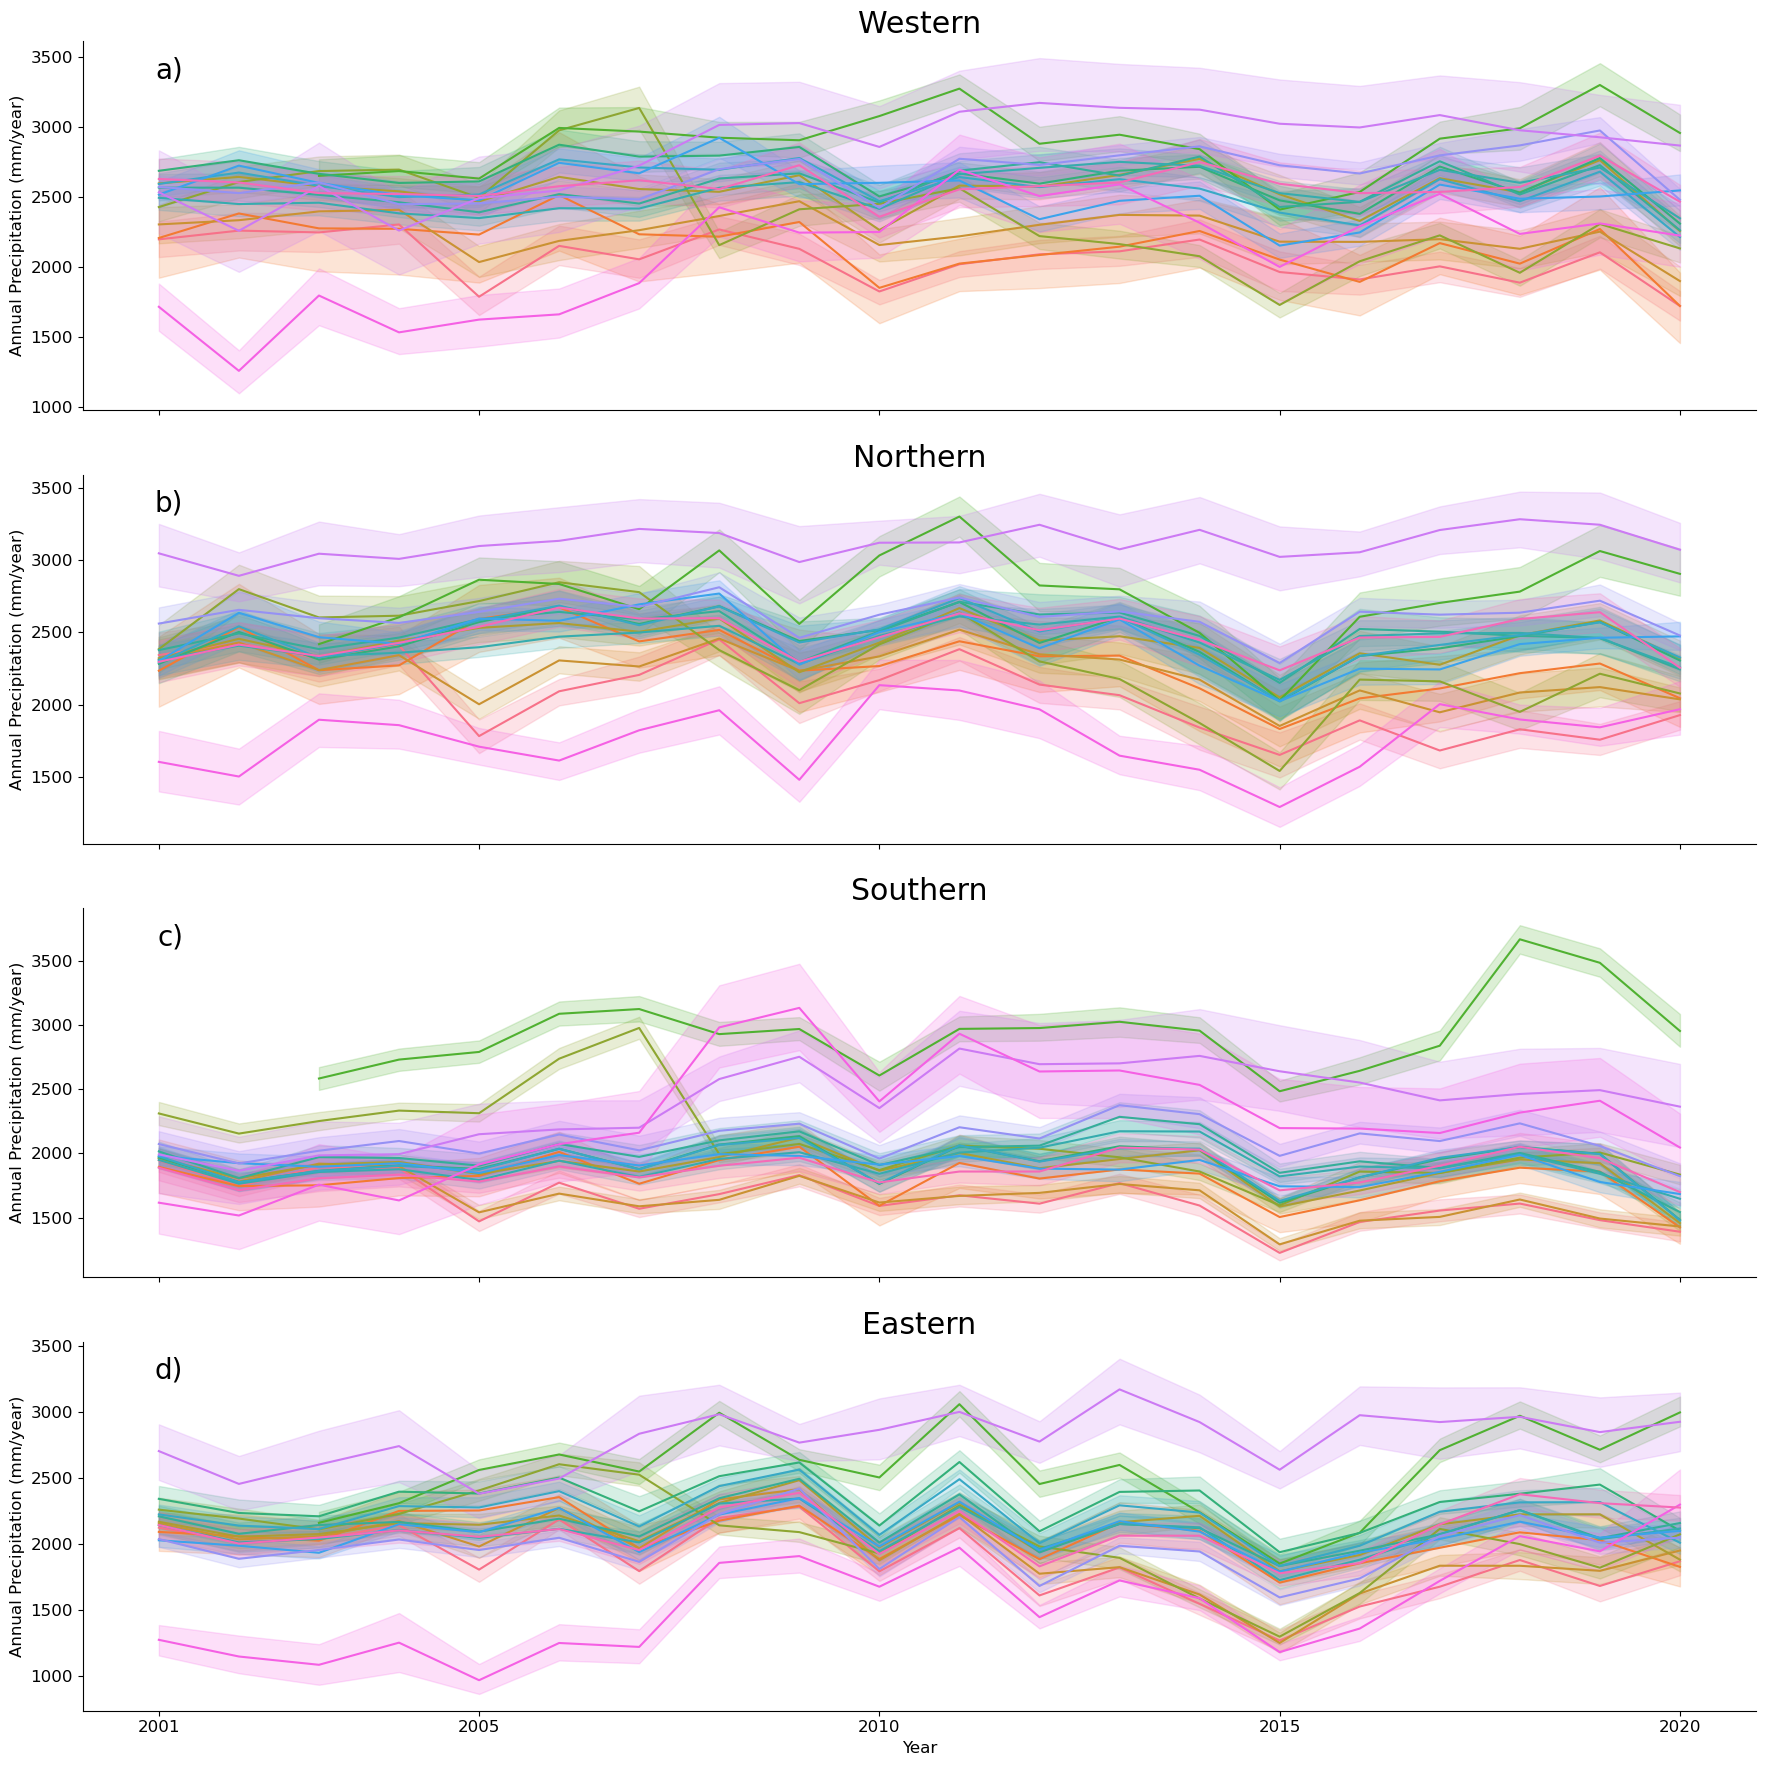

In [37]:
fig, axs = plt.subplots(4, 1, figsize=(18, 18), sharex='col')
plt.rcParams.update({'font.size': 18})
letters_ts = ['a)', 'b)', 'c)', 'd)']
for i, region in enumerate(regions_list):
    df_region = df[df['Region'] == region]
    sns.lineplot(data=df_region, ax=axs[i], x='year', y='pr', hue='Dataset', legend=False)
    axs[i].set_title(region)
    axs[i].set_ylabel('Annual Precipitation (mm/year)')
    axs[i].set_xlabel('Year')
    axs[i].set_xticks([2001, 2005,2010, 2015, 2020])
    axs[i].text(0.06,0.96,  letters_ts[i], transform=axs[i].transAxes,  fontsize=20, va='top', ha='right')
    #Set axs[i, 1] y-axis as scientific notation
    #DESPINE
    sns.despine(ax=axs[i], top=True, right=True, left=False, bottom=False)
#create legend in the bottom center of the figure


plt.tight_layout()

## taylor

In [42]:
from Data.utils.taylor import *
from scipy.stats import pearsonr
df_mean = df.groupby(['year', 'Region', 'Dataset']).mean().reset_index()
#for each dataset and each region, do the pearson r with stations
df_corr = pd.DataFrame()
std_ref = []
for region in regions_list:
    df_region = df_mean[df_mean['Region'] == region]
    df_station = df_region[df_region['Dataset'] == 'Stations']
    for dataset in datasets_names_extras:
        #if dataset is persiann ccs, take only from 2003
        if dataset == 'PERSIANN-CCS':
            df_station = df_region[df_region['Dataset'] == 'Stations' ]
            df_station = df_station[df_station['year'] >= 2003]
        else:
            df_station = df_region[df_region['Dataset'] == 'Stations']
        df_ds = df_region[df_region['Dataset'] == dataset]
        # do correlation
        corr = pearsonr(df_ds.pr.values, df_station.pr.values)[0].round(2)
        df_corr = df_corr.append({'Region': region, 'Dataset': dataset, 'corr': corr, 'sd':df_ds.pr.values.std()/df_station.pr.values.std()}, ignore_index=True)
        std_ref.append(df_station.pr.values.std())
        

C:\Users\luisg\AppData\Local\Temp\ipykernel_23088\2404386331.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({'Region': region, 'Dataset': dataset, 'corr': corr, 'sd':df_ds.pr.values.std()/df_station.pr.values.std()}, ignore_index=True)
C:\Users\luisg\AppData\Local\Temp\ipykernel_23088\2404386331.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({'Region': region, 'Dataset': dataset, 'corr': corr, 'sd':df_ds.pr.values.std()/df_station.pr.values.std()}, ignore_index=True)
C:\Users\luisg\AppData\Local\Temp\ipykernel_23088\2404386331.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({'Region': region, 'Dataset': dataset, 'corr': corr, 'sd':df

In [14]:
gauge = ['CPC','CMAP']
sat = ['CMORPH', 'GPCP v3.2', 'PERSIANN', 'PERSIANN-CCS', 'PERSIANN-CDR','MSWEP v2.8',
                    'MSWEP_nogauge v2.8', 'GLDAS v2.1','WorldClim']
reanalisys = ['ERA5', 'NCEP R1', 'NCEP R2']

#create a palette
palette = sns.color_palette("tab20", len(datasets_names_extras))
#create the legend for the plot, gauge as dot, reanalisys as ^, sat as *
marker_elements = [Line2D([0], [0], marker='o', color='w', label='Gauge',
                          markerfacecolor=palette[0], markersize=15),
                   Line2D([0], [0], marker='^', color='w', label='Reanalysis',
                          markerfacecolor=palette[1], markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='Satellite',
                          markerfacecolor=palette[2], markersize=15)]
legend_elements = [Line2D([0], [0],  marker='s', color='w', label=datasets_names_extras[i], markerfacecolor=palette[i], markersize=12) for i in range(len(palette))]
legend_elements = marker_elements + legend_elements

#create marker list considering the order of the datasets, and the type of dataset
marker_list = []
for dataset in datasets_names_extras:
    if dataset in gauge:
        marker_list.append('o')
    elif dataset in reanalisys:
        marker_list.append('^')
    elif dataset in sat:
        marker_list.append('*')


In [47]:
df_corr

Region             Dataset  corr        sd
0    Western                 CPC  0.47  1.731750
1    Western                CMAP  0.54  1.933291
2    Western              CMORPH  0.49  1.407781
3    Western           GPCP v3.2  0.83  1.431450
4    Western            PERSIANN -0.07  3.520080
5    Western        PERSIANN-CCS  0.20  2.261841
6    Western        PERSIANN-CDR  0.57  1.551523
7    Western          MSWEP v2.8  0.59  1.439543
8    Western  MSWEP_nogauge v2.8  0.57  1.386662
9    Western          GLDAS v2.1  0.50  1.515427
10   Western           WorldClim -0.04  1.738953
11   Western                ERA5  0.65  1.689482
12   Western             NCEP R1  0.20  2.989719
13   Western             NCEP R2  0.07  4.064678
14  Northern                 CPC  0.08  1.951417
15  Northern                CMAP  0.65  1.523307
16  Northern              CMORPH  0.35  1.308012
17  Northern           GPCP v3.2  0.86  1.065769
18  Northern            PERSIANN  0.40  2.559294
19  Northern        PERSIANN-CCS  0.65  2.138685
20  Northern        PERSIANN-CDR  0.85  1.223349
21  Northern          MSWEP v2.8  0.87  1.067980
22  Northern  MSWEP_nogauge v2.8  0.86  0.866861
23  Northern          GLDAS v2.1  0.84  1.229735
24  Northern           WorldClim  0.62  1.359863
25  Northern                ERA5  0.85  0.837344
26  Northern             NCEP R1  0.60  0.755067
27  Northern             NCEP R2  0.36  1.695175
28  Southern                 CPC  0.34  1.692090
29  Southern                CMAP  0.71  1.465850
30  Southern              CMORPH  0.32  1.597386
31  Southern           GPCP v3.2  0.74  1.391858
32  Southern            PERSIANN -0.02  2.962542
33  Southern        PERSIANN-CCS  0.67  2.742205
34  Southern        PERSIANN-CDR  0.84  1.503823
35  Southern          MSWEP v2.8  0.74  1.498065
36  Southern  MSWEP_nogauge v2.8  0.81  1.198184
37  Southern          GLDAS v2.1  0.84  1.483546
38  Southern           WorldClim  0.50  0.856365
39  Southern                ERA5  0.85  1.238022
40  Southern             NCEP R1  0.43  2.733674
41  Southern             NCEP R2  0.49  4.222434
42   Eastern                 CPC  0.61  1.513600
43   Eastern                CMAP  0.54  0.974253
44   Eastern              CMORPH  0.59  1.567257
45   Eastern           GPCP v3.2  0.76  0.939059
46   Eastern            PERSIANN  0.31  1.776566
47   Eastern        PERSIANN-CCS  0.77  1.814809
48   Eastern        PERSIANN-CDR  0.74  1.043718
49   Eastern          MSWEP v2.8  0.82  0.878578
50   Eastern  MSWEP_nogauge v2.8  0.86  0.835435
51   Eastern          GLDAS v2.1  0.77  1.040597
52   Eastern           WorldClim  0.76  0.813207
53   Eastern                ERA5  0.93  1.106448
54   Eastern             NCEP R1  0.28  1.171144
55   Eastern             NCEP R2  0.68  2.131487

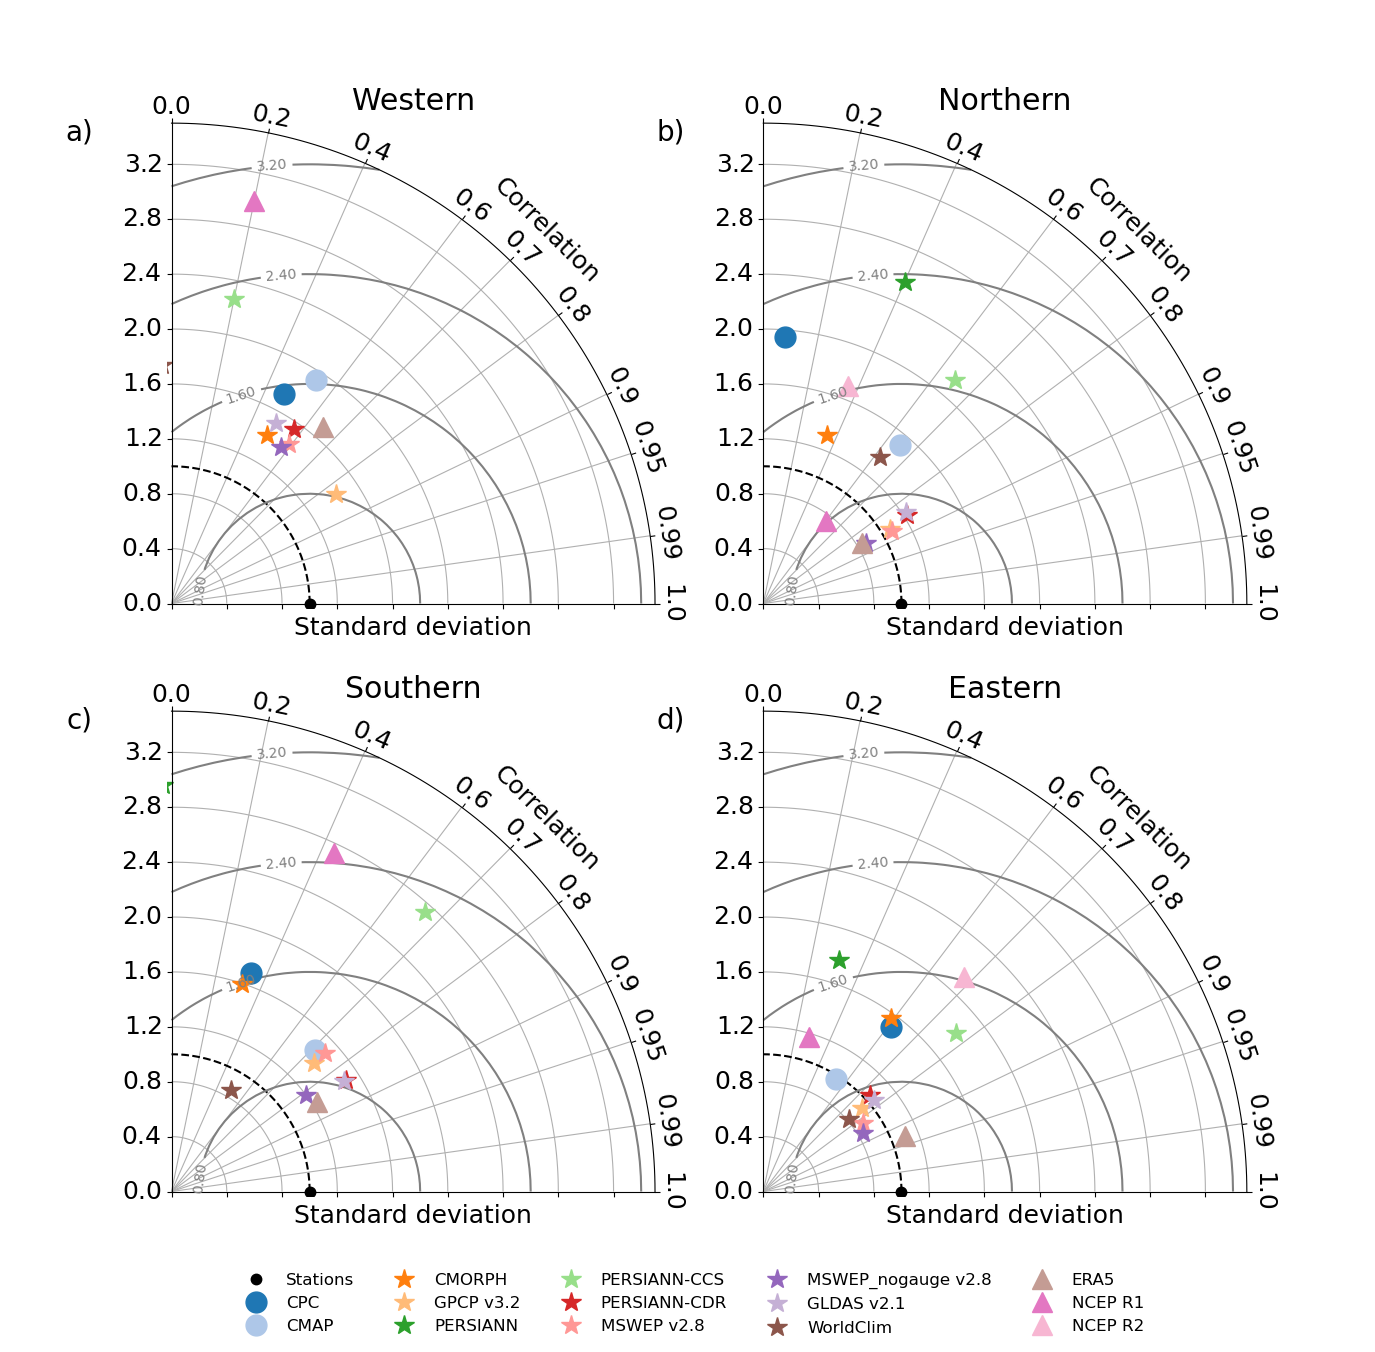

In [48]:
# Create a figure and a gridspec layout
fig = plt.figure(figsize=(14, 14))
letters_ts = ['a)', 'b)', 'c)', 'd)']

mss = 15
for i, region in enumerate(regions_list ):
    dia = TaylorDiagram(1, fig=fig, label='Stations', extend=False, rect=int('22'+str(i+1)),srange=(0, 3.5),mss =mss)
# Create a figure and a gridspec layout

    df_reg = df_corr[df_corr.Region == region]
    # Add samples to Taylor diagram
    contours = dia.add_contours(colors='0.5')
    for j, name in enumerate(datasets_names_extras):
        df_set = df_reg[df_reg['Dataset'] == name]
        std = df_set['sd'].values[0]
        corr = df_set['corr'].values[0]
        dia.add_sample(std, corr, ms=mss, ls='', mfc=palette[j], mec=palette[j], label=name,marker=marker_list[j])
    dia.add_grid()                                  # Add grid
    dia._ax.axis[:].major_ticks.set_tick_out(True)
    dia._ax.axis['left'].toggle(ticklabels=False)
    dia._ax.axis['left'].label.set_text("Standard deviation")
    dia._ax.set_title(region)
    dia._ax.text(-0.15,1,  letters_ts[i], transform=dia._ax.transAxes,  fontsize=20, va='top', ha='right')    
    # Put ticks outward
#legend in the middle outside of the plot
    plt.clabel(contours, inline=1, fontsize=10, fmt='%.2f')

fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, bbox_to_anchor=(0.5, 0.0), loc='lower center', ncol=5, frameon=False, fontsize=12)

#legend in the middle outside of the plot
plt.tight_layout()

## PtP


In [49]:
df_stat = pd.read_csv(r'Data\Datasets\amz\map\stations_ts.csv', index_col=0)
#merge with stations to get the region
df_stat = df_stat.merge(stations[['Code','geometry']], on='Code')
df_stat = df_stat.rename(columns={'Total':'pr', 'Date':'year'})
# Step 1: Convert GeoDataFrame to DataFrame with point coordinates, rainfall values, and timestamps
data = df_stat[['geometry', 'year', 'pr']].copy()
data['lon'] = data['geometry'].apply(lambda p: p.x)
data['lat'] = data['geometry'].apply(lambda p: p.y)
data = data.drop(columns=['geometry'])
from Data.utils.evaluation import calculate_metrics, create_metrics_dataframe,  datasets_05
from Data.utils.datasets_plotting import plot_datasets33_nostat
metrics_dict = calculate_metrics(data, datasets_names_extras, ds_dict, 'pr')
df_metrics = create_metrics_dataframe(metrics_dict, datasets_names_extras)


d:\GU\IC\Scripts\Data\utils\evaluation.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(dff)
d:\GU\IC\Scripts\Data\utils\evaluation.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(dff)
d:\GU\IC\Scripts\Data\utils\evaluation.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(dff)
d:\GU\IC\Scripts\Data\utils\evaluation.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(dff)
d:\GU\IC\Scripts\Data\utils\evaluation.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pan

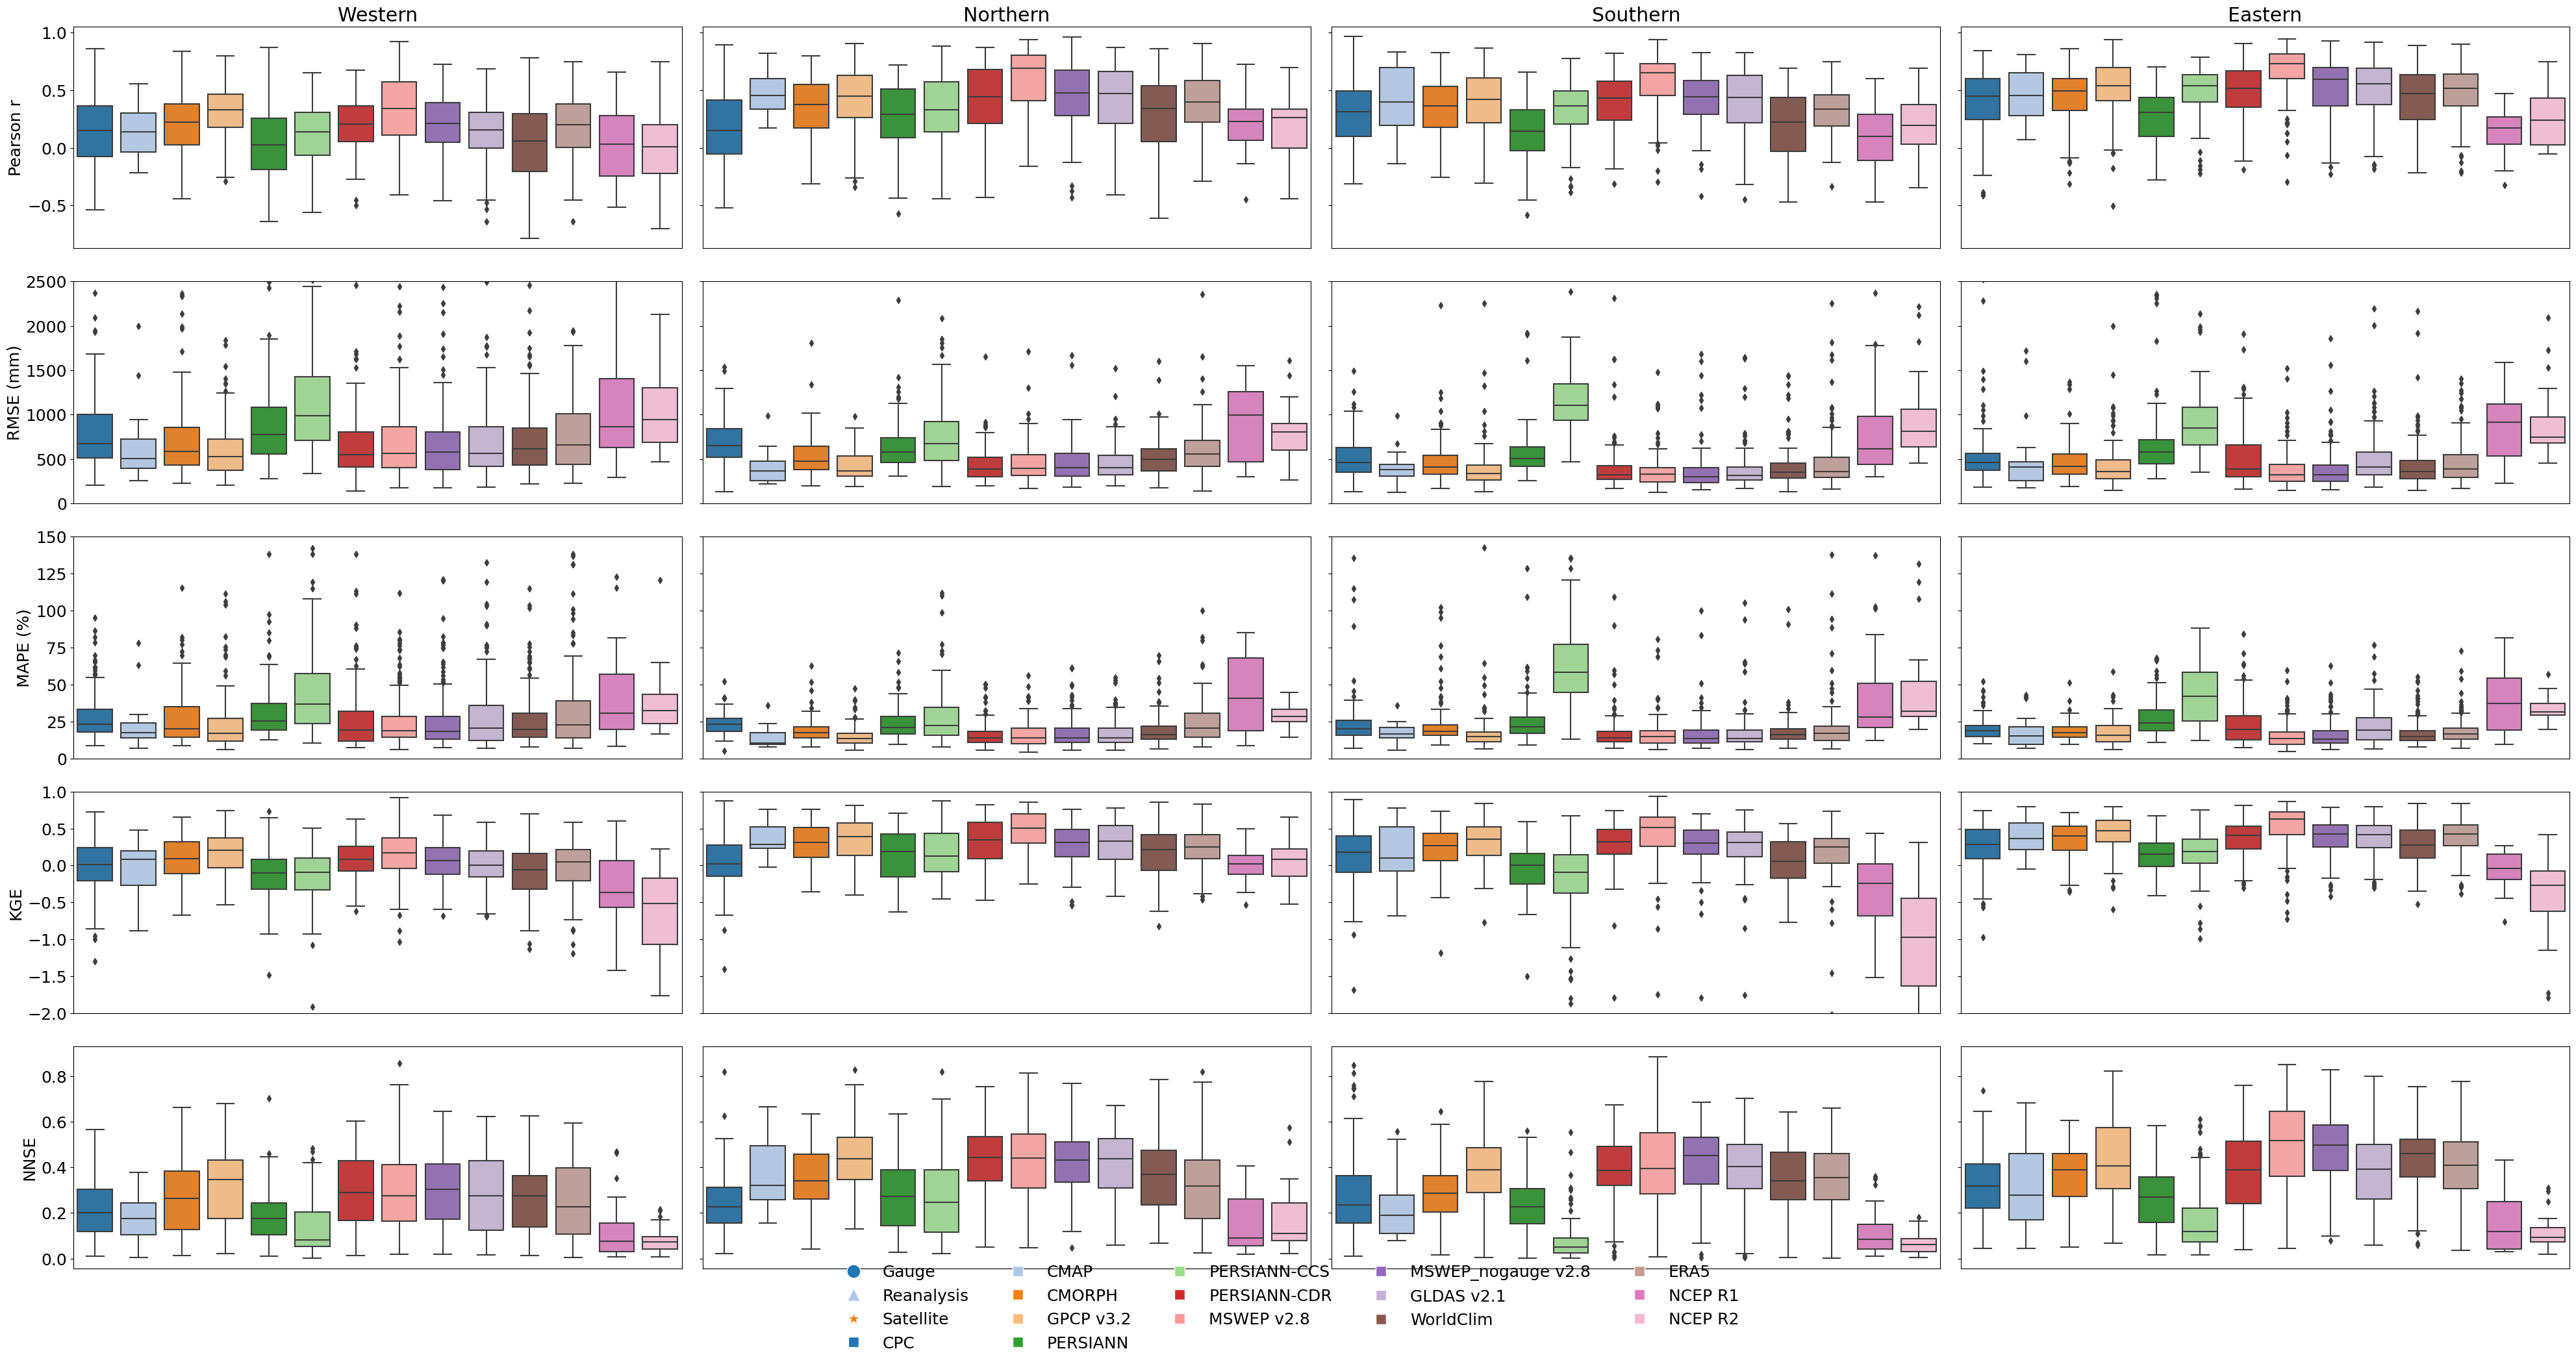

In [50]:
df_metrics['nnse'] = 1/(2-df_metrics['nse'])
metrics_plot = ['corr','rmse', 'mape', 'kge','nnse']
metrics_label = ['Pearson r', 'RMSE (mm)', 'MAPE (%)', 'KGE', 'NNSE']

fig, axes = plt.subplots(len(metrics_plot), 4, figsize = (40, 20), sharey='row')
for i, metric in enumerate(metrics_plot):
    for j, region in enumerate(regions_list):
        #box plot
        df_region = df_metrics[df_metrics.Region == region]
        sns.boxplot( y=metric, data=df_region, ax=axes[i,j], hue='Dataset',x='Dataset',dodge=False,palette=palette).get_legend().remove()
        #axes[i,j].set_title(region)
        axes[i,j].set_xlabel('')
        axes[i,j].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
        if j == 0:
            axes[i,j].set_ylabel(metrics_label[i])
        else:
            axes[i,j].set_ylabel('')
        if i == 0:
            axes[i,j].set_title(region)

axes[1,0].set_ylim(0,2500)
axes[2,0].set_ylim(0,150)
axes[3,0].set_ylim(-2,1)
fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.06), loc='lower center', ncol=5, frameon=False, fontsize=18)

plt.tight_layout()

In [51]:
df_metrics_mean = df_metrics.groupby(['Region', 'Dataset']).mean().reset_index()#.set_index('Dataset').groupby('Region')
df_metrics_mean = df_metrics_mean.set_index('Dataset').groupby('Region')
#get a table with the best dataset for each metric and region
metrics_min = ['rmse','mae','mape']
metrics_max = ['corr','kge','nse']
df_metrics_best = df_metrics_mean[metrics_max].idxmax()
df_metrics_best[metrics_min] = df_metrics_mean[metrics_min].idxmin() 
df_metrics_best
#df_metrics_mean[['corr','rmse','mae','mape','kge','nse','pbias']].reset_index().set_index('Dataset').groupby('Region').idxmax()

corr         kge                 nse        rmse         mae  \
Region                                                                         
Eastern   MSWEP v2.8  MSWEP v2.8  MSWEP_nogauge v2.8  MSWEP v2.8  MSWEP v2.8   
Northern  MSWEP v2.8  MSWEP v2.8           GPCP v3.2        CMAP        CMAP   
Southern  MSWEP v2.8  MSWEP v2.8          MSWEP v2.8  MSWEP v2.8  MSWEP v2.8   
Western   MSWEP v2.8   GPCP v3.2  MSWEP_nogauge v2.8   GPCP v3.2   GPCP v3.2   

                mape  
Region                
Eastern   MSWEP v2.8  
Northern        CMAP  
Southern        CMAP  
Western         CMAP

In [52]:
df_metrics_mean_main = pd.read_csv(r'Data\Datasets\amz\map\metrics_mean.csv', index_col=0)
df_metrics_mean = df_metrics.groupby(['Region', 'Dataset']).mean().reset_index()#.set_index('Dataset').groupby('Region')
#append the dfs
df_metrics_all = df_metrics_mean.append(df_metrics_mean_main)
df_metrics_mean_all = df_metrics_all.set_index('Dataset').groupby('Region')
#get a table with the best dataset for each metric and region
metrics_min = ['rmse','mae','mape']
metrics_max = ['corr','kge','nse']
df_metrics_best = df_metrics_mean_all[metrics_max].idxmax()
df_metrics_best[metrics_min] = df_metrics_mean_all[metrics_min].idxmin() 
df_metrics_best

C:\Users\luisg\AppData\Local\Temp\ipykernel_23088\3521167798.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics_all = df_metrics_mean.append(df_metrics_mean_main)


corr         kge         nse        rmse         mae  mape
Region                                                                    
Eastern   MSWEP v2.8  MSWEP v2.8        GPCC        GPCC        GPCC  GPCC
Northern  MSWEP v2.8  MSWEP v2.8      CHIRPS      CHIRPS      CHIRPS  CMAP
Southern  MSWEP v2.8  MSWEP v2.8  MSWEP v2.8  MSWEP v2.8  MSWEP v2.8  CMAP
Western   MSWEP v2.8   GPCP v3.2      CHIRPS      CHIRPS      CHIRPS  CMAP

# trend

In [6]:
folder_metric = r'Data\Datasets\amz\map\trend'

ds_dict = {}
for i, dataset in enumerate(datasets_extras):
    ds = xr.open_dataset(os.path.join(folder_metric, dataset + '.nc'))
    #create mask from regions
    mask = regions_mask.mask(ds, lon_name='lon', lat_name='lat')
    ds['Region'] = mask
    ds['trend_ratio'] = ds['slopes'] / ds['intercepts']  * 100
    ds_dict[datasets_names_extras[i]] = ds


#create a df with all ds in ds_dict
df = pd.DataFrame()
for name in datasets_names_extras:
    dff =  ds_dict[name].to_dataframe().dropna().reset_index(drop=True)
    dff['Dataset'] = name
    df = df.append(dff)
df = df[['Region', 'Dataset', 'slopes', 'intercepts', 'p_values','trend_ratio']]
df['Region'] = df['Region'].replace(regions_replace)
stations['trend_ratio'] = stations['slope_anual'] / stations['intercept_anual'] * 100
df_stat = stations[['p_anual', 'slope_anual','intercept_anual', 'Region','trend_ratio']].copy()
df_stat['Dataset'] = 'Stations'
df_stat = df_stat.rename(columns={'p_anual':'p_values', 'slope_anual':'slopes', 'intercept_anual':'intercepts'})
df = df.append(df_stat)

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: Sh

In [17]:
#import mpatches
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerTuple

vmin = -3#40
vmax = 3#40
levels = 17
cmap =  mpl.cm.BrBG
extend_cbar = 'both'
var = 'trend_ratio'#'slopes'
var_stat ='trend_ratio' #'slope_anual'
label_cbar = 'Trend (%/year)'#'MAP trend(mm/year/year)'

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.colors as colors
import matplotlib.cm as cm
plt.rcParams.update({'font.size': 18})
legend_elements_sig = [ (mpatches.Patch(facecolor='grey', edgecolor='black', hatch='///'),
                        Line2D([0], [0],  marker='o', color='w', markerfacecolor='grey', markersize=12, markeredgewidth=1.5, markeredgecolor='black')),
                          (mpatches.Patch(facecolor='grey', edgecolor='black'),
                           Line2D([0], [0],  marker='o', color='w', markerfacecolor='none', markersize=12, markeredgecolor='black', markeredgewidth=1.5))]
def plot_datasets15_trend_sig(subfigg, datasets_names, ds_dict, stations, regions, vmin, vmax, levels, cmap, extend_cbar, var, var_stat, label_cbar, extent=[-81, -42, -20, 11], proj=ccrs.Mercator(), ms=40):
    """
    Plot multiple datasets along with station and regional data on a grid of subplots.

    Parameters:
        datasets_names (list): A list of dataset names to plot.
        ds_dict (dict): A dictionary containing datasets with keys as dataset names and values as data arrays.
        stations (geopandas.GeoDataFrame): A GeoDataFrame containing station data.
        regions (geopandas.GeoDataFrame): A GeoDataFrame containing regional data.
        vmin (float): Minimum value for the color scale.
        vmax (float): Maximum value for the color scale.
        levels (int): Number of levels in the color scale.
        proj (cartopy.crs.Projection): The projection for the subplots.
        cmap (matplotlib.colors.Colormap): The colormap for the plots.
        extend_cbar (str): The colorbar extension ('min', 'max', or 'both').
        var (str): The variable key in the datasets to plot.
        var_stat (str): The variable key in the station GeoDataFrame to plot.
        extent (list): The geographical extent of the plot [min_lon, max_lon, min_lat, max_lat].
        label_cbar (str): Label for the colorbar.

    Returns:
        None

    Example:
        # Define the required variables
        vmin = -400
        vmax = 0.01
        levels = 9
        proj = ccrs.Mercator()
        cmap = cm.lajolla
        extend_cbar = 'min'
        var = 'mcwd'
        var_stat = 'mcwd'
        extent = [-81, -42, -20, 11]
        label_cbar = 'Maximum Cumulative Water Deficit (mm)'

        # Call the function to plot the datasets
        plot_datasets(datasets_names, ds_dict, stations, regions, vmin, vmax, levels, proj, cmap, extend_cbar, var, var_stat, extent, label_cbar)
    """
    
    bounds = np.linspace(vmin, vmax, levels)
    norm = colors.BoundaryNorm(bounds, cmap.N, extend=extend_cbar)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    
    axes = subfigg.subplots(3, 5, subplot_kw={'projection': proj})
    axes = axes.flatten()
    # Color bar
    cax = subfigg.add_axes([0.05, -0.12, 0.9, 0.06])
    subfigg.colorbar(sm, cax=cax, orientation='horizontal', label=label_cbar)
    
    # Loop through the datasets and plot them
    for i, name in enumerate(datasets_names):
        ax = axes[i]
        ds = ds_dict[name]
        im = ds[var].plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), levels=levels, extend=extend_cbar)
        ds[var].where(ds.p_values <= 0.05).plot.contourf(ax=ax, colors='none', hatches=['///'], add_colorbar=False,transform=ccrs.PlateCarree())
        ax.add_geometries(regions.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=1)
        ax.add_feature(cf.BORDERS, edgecolor='grey', linewidth=0.4)
        axes[i].set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.set_title(name)
    
    ax_stat = axes[-1]
    ax_stat.coastlines(transform=ccrs.PlateCarree())
    ax_stat.add_geometries(cf.BORDERS.geometries(), crs=proj, linewidth=0.4, edgecolor='grey', facecolor='none', zorder=0)
    ax_stat.add_geometries(cf.COASTLINE.geometries(), crs=proj, linewidth=1, edgecolor='black', facecolor='none', zorder=0)
    #stations.plot(ax=ax_stat, column=var_stat, cmap=cmap, scheme="User_Defined",
    #              classification_kwds=dict(bins=bounds), linewidth=0.2, edgecolor='black')
    stations[stations.p_anual > 0.05].plot(edgecolor=cmap(norm(stations[var_stat].values)), linewidth=1.5, marker='o', markersize=ms,
                                           legend=False,facecolor='none',ax=ax_stat)    

    stations[stations.p_anual <= 0.05].plot( column=var_stat, cmap=cmap, scheme="User_Defined", markersize=ms*1.2,
                  classification_kwds=dict(bins=bounds), linewidth=0.2, edgecolor='black',ax=ax_stat)
    #create legend of significant and non-significant stations and plot it in the lower right corner

    subfigg.legend(handles=legend_elements_sig,labels=[r'p <= 0.05', 'p > 0.05'],handler_map={tuple: HandlerTuple(ndivide=None)},
                    bbox_to_anchor=(0.5, -0.06), loc='lower center', ncol=2, frameon=False, fontsize=15)
    ax_stat.set_title('Stations')
    regions.plot(ax=ax_stat, facecolor='none', edgecolor='green', linewidth=1, alpha=0.7)
    ax_stat.set_xlim(extent[0], extent[1])
    ax_stat.set_ylim(extent[2], extent[3])

    #letters = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)']
    #for i in range(len(datasets_names)+1):
    #    axes[i].text(0.92,0.96,  letters[i], transform=axes[i].transAxes,  fontsize=18, va='top', ha='right')


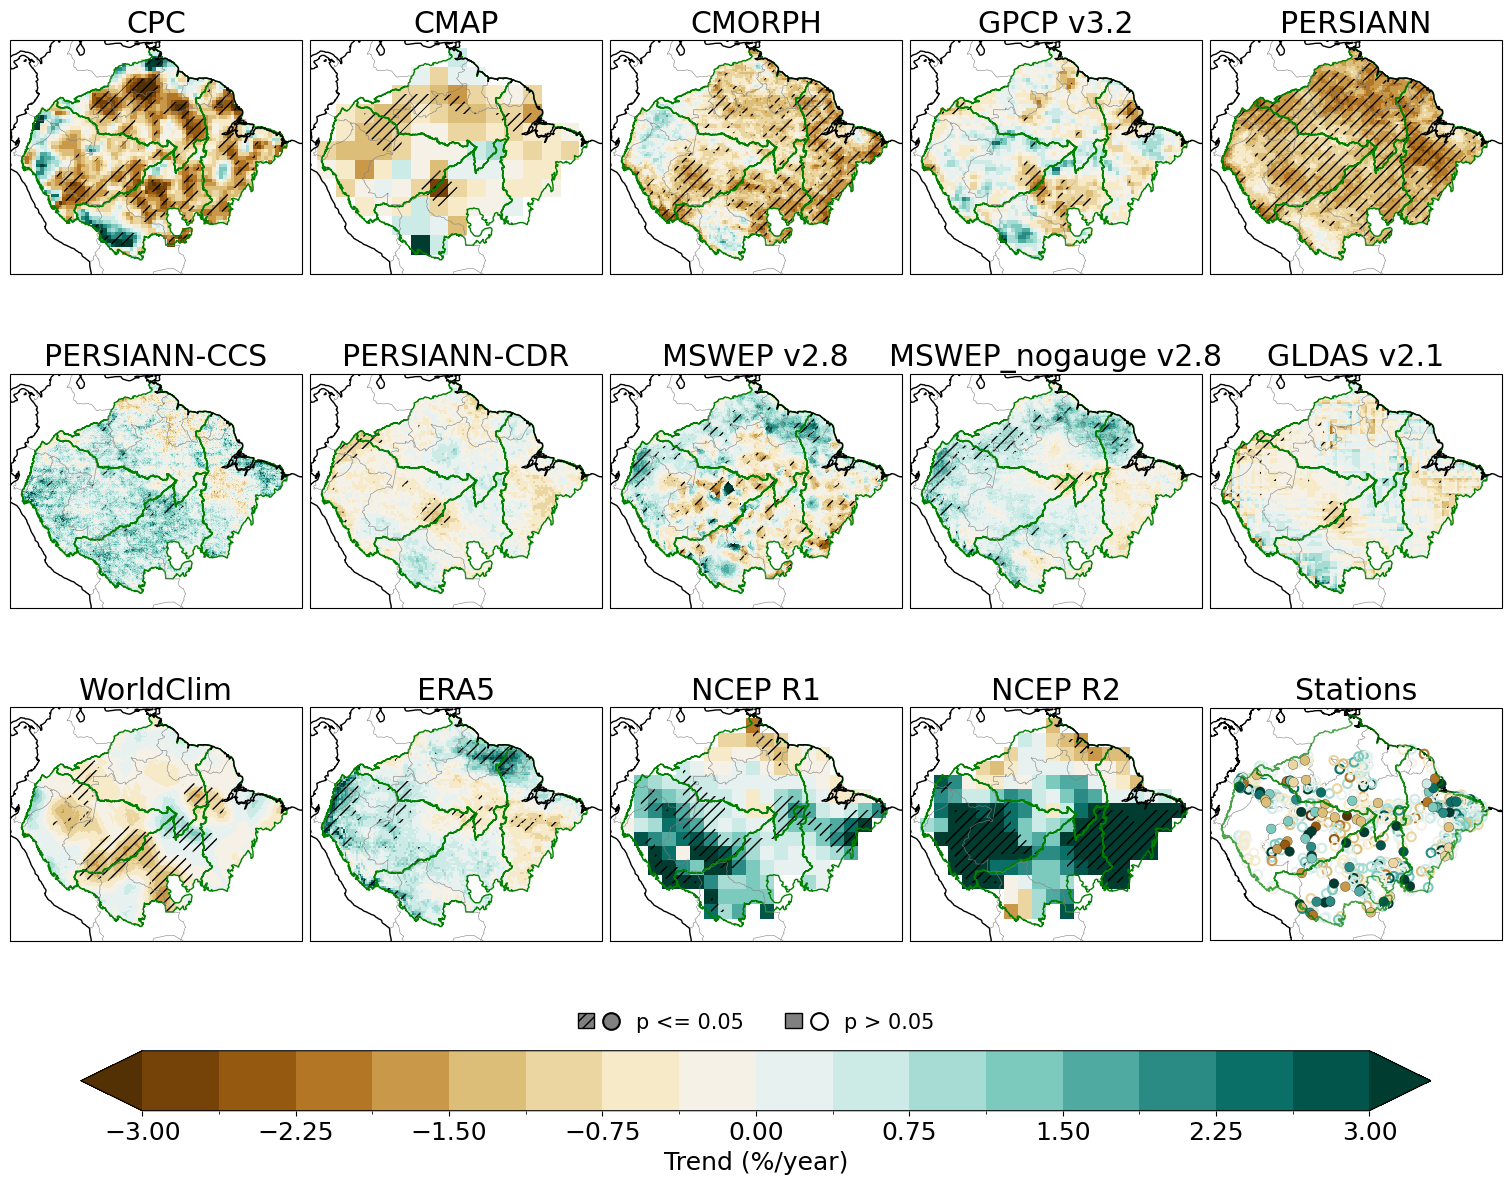

In [19]:

fig = plt.figure(layout='constrained', figsize=(15,10))
plot_datasets15_trend_sig(fig, datasets_names_extras, ds_dict, stations, regions, vmin, vmax, levels, cmap, extend_cbar, var, var_stat, label_cbar)


In [57]:
#create a significant column for df
df['Significancy'] = df['p_values'] <= 0.05
df['Significancy'].replace({True: 'Significant', False: 'Not Significant'}, inplace=True)
df_all = df.copy()
df_all['Significancy'] = 'All'
df_sig = df[df['Significancy'] == 'Significant']
df_all = pd.concat([df_all, df_sig])

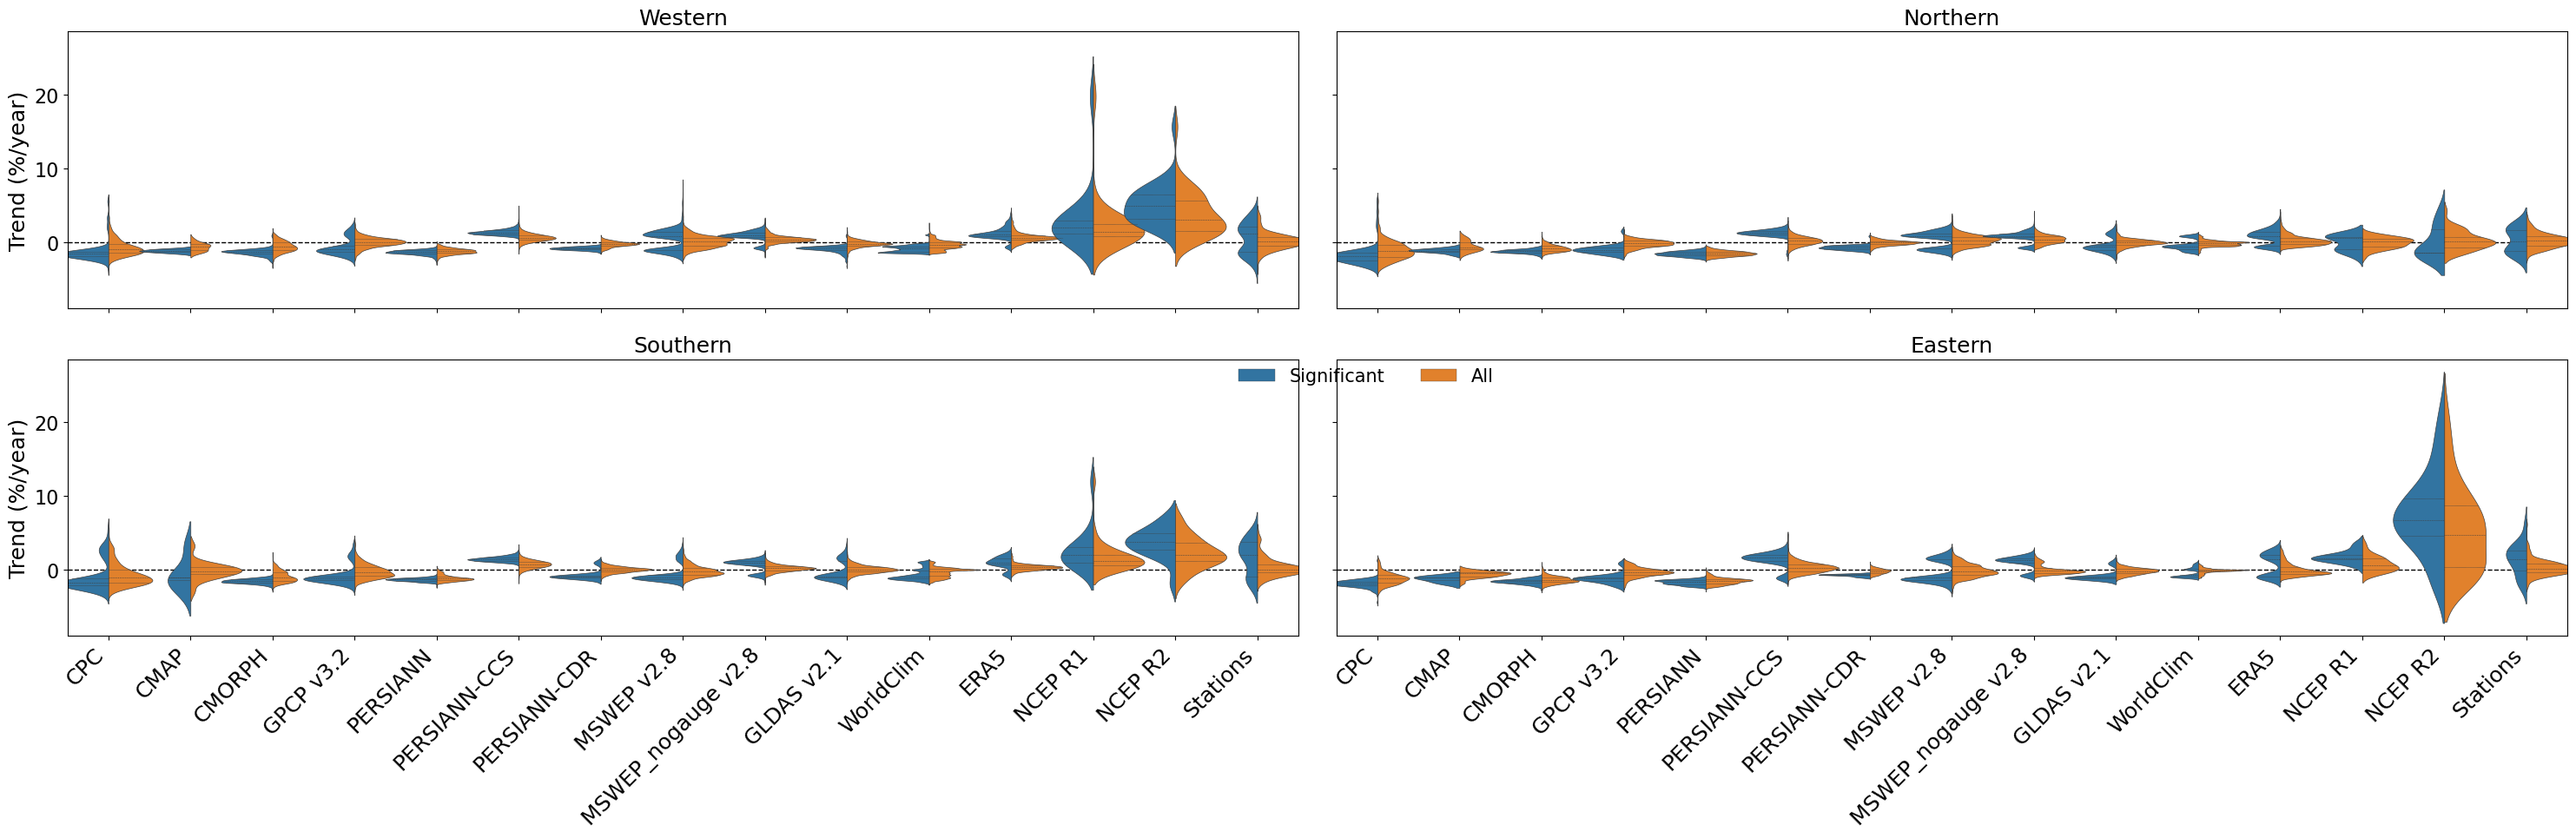

In [58]:
#plot violinplot of df_all with significant column for each region and dataset
fig, axes = plt.subplots(2,2, figsize=(30,10), sharex=True, sharey=True)
#font size as 12
plt.rcParams.update({'font.size': 18})
axes = axes.flatten()
for i, region in enumerate(regions_list):
    ax = axes[i]
    sns.violinplot(data=df_all[df_all.Region==region], x='Dataset', y=var, hue='Significancy', 
                   hue_order=['Significant', 'All'], ax=ax, split=True,  
                   linewidth=0.5,width=1.25, inner='quartile',scale='area')
    ax.set_title(region, fontsize=18)
    #set x lim 
    #ax.set_xlim(-0.9, 8.9)
    ax.set_xlabel('')
    ax.set_ylabel('')
    #leave only the legend for last subplot
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()

    ax.tick_params(axis='y', which='both', labelsize=16)
    #set ticks label 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    #horizontal line in 0
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1, zorder= -10)
    if i % 2 == 0:
        ax.set_ylabel(label_cbar, fontsize=18)
    else:
        ax.set_ylabel('')

#take the legend from axes[3], to figure and place it in the centeer
handles, labels = axes[3].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.53, 0.52), loc='lower center', ncol=2, frameon=False, fontsize=15)
plt.tight_layout()


In [9]:
stations['trend_ratio'] = stations['slope_anual'] / stations['intercept_anual'] * 100
data = stations[['geometry','slope_anual','trend_ratio']].copy()
data = data.rename(columns={'slope_anual':'slopes'})
data['lon'] = data['geometry'].apply(lambda p: p.x)
data['lat'] = data['geometry'].apply(lambda p: p.y)
data = data.drop(columns=['geometry'])
var = 'trend_ratio'

metrics_dict = {}
for name in datasets_names_extras:
    ds = ds_dict[name].copy()
    # Step 2: Assign each point to the grid cells of the 'ds' DataArray
    ds_grid_lon, ds_grid_lat = ds.lon.values, ds.lat.values
    data['lon_bin'] = np.digitize(data['lon'], ds_grid_lon)
    data['lat_bin'] = np.digitize(data['lat'], ds_grid_lat)
    for var in ['trend_ratio', 'slopes']:

        # Step 3: Compute the mean value for each grid cell and each year
        grid_cells = data.groupby(['lat_bin', 'lon_bin'])[var].mean().reset_index()
        # Step 4: Create an empty DataArray with NaN values
        empty_grid = np.full((len(ds_grid_lat), len(ds_grid_lon)), np.nan)
        # Step 5: Fill the DataArray with the computed mean values for each year
        for _, row in grid_cells.iterrows():
            #year_idx = np.where(data['year'].unique() == row['year'])[0][0]
            lat_idx, lon_idx = row['lat_bin'], row['lon_bin']
            lat_idx, lon_idx = int(lat_idx), int(lon_idx)
            empty_grid[lat_idx - 1, lon_idx - 1] = row[var]
        # Step 6: Create an xarray DataArray from the result with the year dimension
        #year_coords = data['year'].unique()
        data_array = xr.DataArray(empty_grid,
                                    dims=('lat', 'lon'),
                                    coords={'lat': ds_grid_lat, 'lon': ds_grid_lon})
        # Calculate various metrics
        ds[var + '_stat'] = data_array
    metrics_dict[name] = ds

In [11]:
df_compare = pd.DataFrame()
for name in datasets_names_extras:
    df_comparef =  metrics_dict[name].to_dataframe().dropna().reset_index(drop=True)
    df_comparef['Dataset'] = name
    df_compare = df_compare.append(df_comparef)

df_compare = df_compare[['p_values', 'Region', 'Dataset','trend_ratio', 'trend_ratio_stat', 'slopes','slopes_stat']]
df_compare['Region'] = df_compare['Region'].replace(regions_replace)
#create significant column, if the row has pvalue less than 0.05 is significant
df_compare['significant'] = df_compare['p_values'] < 0.05
df_compare['significant'].replace({True: 'Significant', False: 'Not Significant'}, inplace=True)


C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\1971297411.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\1971297411.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\1971297411.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\AppData\Local\Temp\ipykernel_17584\1971297411.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\A

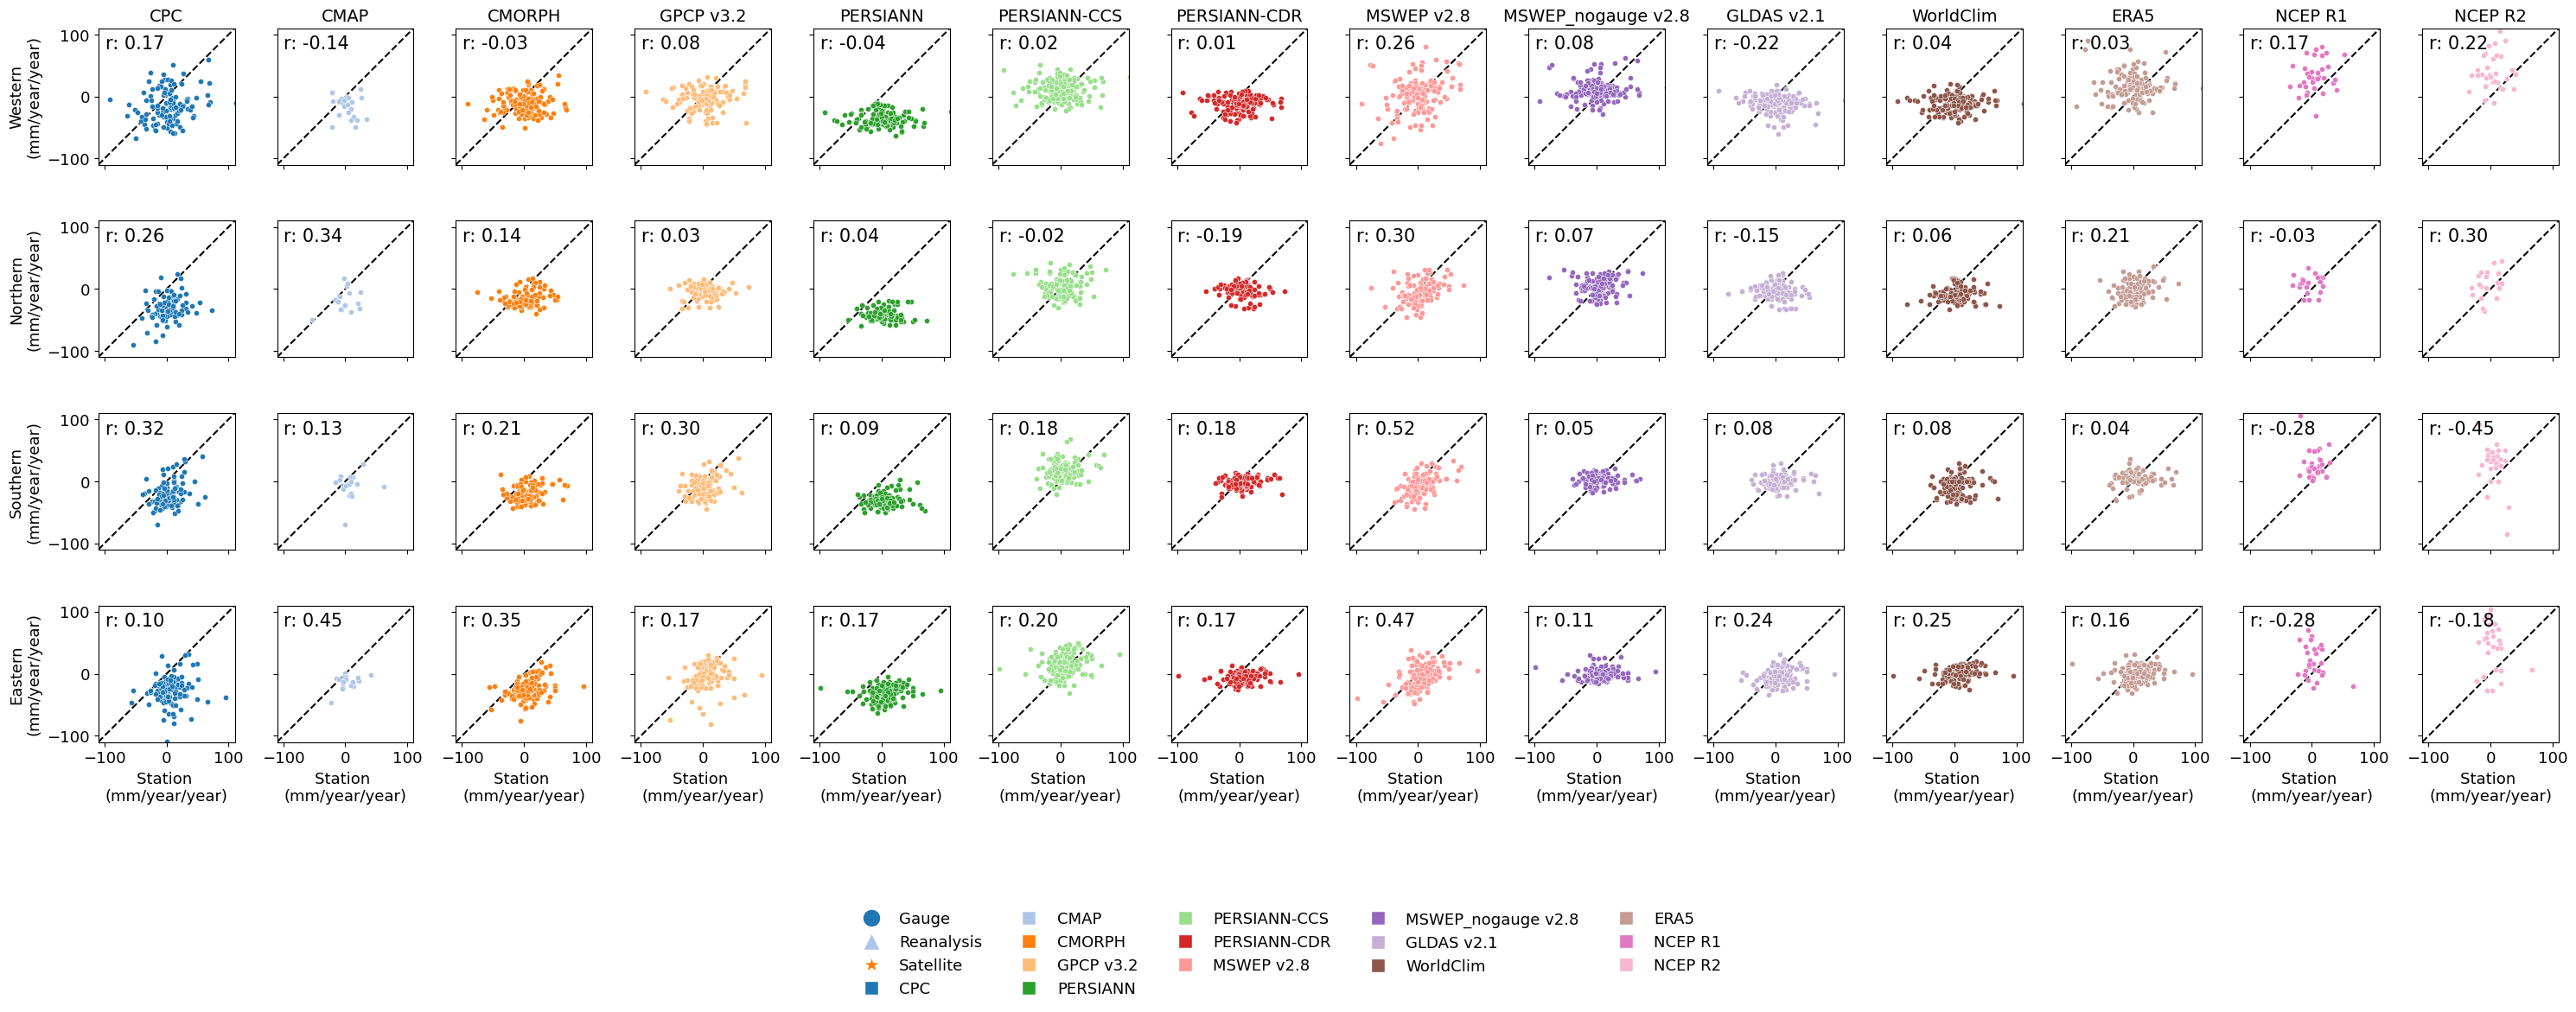

In [15]:
fig, axes = plt.subplots(4,14, figsize=(30,10), sharex=True, sharey=True)
limm = 110
#set font size 13
plt.rcParams.update({'font.size': 13})
for i, name in enumerate(datasets_names_extras):
    df_ds = df_compare[df_compare['Dataset'] == name]
    for j, region in enumerate(regions_list):
        df_plot = df_ds[df_ds['Region'] == region]
        sns.scatterplot(data=df_plot,x='trend_ratio_stat', y='trend_ratio', ax=axes[j,i], s=20, color=palette[i], legend=False)
        
        axes[j,i].set_xlabel('Station \n(mm/year/year)')
        axes[j,i].set_ylabel(region + '\n(mm/year/year)')
        axes[j,i].set_xlim(-limm,limm)
        axes[j,i].set_ylim(-limm,limm)
        axes[j,i].plot([-limm,limm],[-limm,limm], color='black', linestyle='--',zorder=-30)
        axes[j,i].set_aspect('equal', 'box')
        corr = df_plot['trend_ratio_stat'].corr(df_plot['trend_ratio'])
        axes[j,i].text(0.05, 0.95, f'r: {corr:.2f}', transform=axes[j,i].transAxes, fontsize=15, verticalalignment='top')
    axes[0,i].set_title(name, fontsize=14)
    #calculate the Coefficient of determination
    #axes[7].legend(bbox_to_anchor=(0.5, -0.limm), loc='lower center', ncol=3, frameon=False, fontsize=1limm)

    
    
fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=5, frameon=False)
plt.tight_layout()

# resolutions

In [62]:
#calculate the spacial resolution of each dataset
folder_metric = r'Data\Datasets\amz\ts'

for dataset in datasets_extras:
    ds = xr.open_dataset(os.path.join(folder_metric, dataset + '.nc'))
    lat = ds.lat.values
    lon = ds.lon.values
    res_lat = lat[1] - lat[0]
    res_lon = lon[1] - lon[0]
    first_date = ds.time.values[0]
    #take only the year and month
    first_date = first_date.astype('datetime64[M]')
    
    print(dataset, res_lat.round(3), res_lon.round(3), first_date)


cpc 0.5 0.5 2001-01
cmap 2.5 2.5 2001-01
cmorph 0.25 0.25 2001-01
gpcp 0.5 0.5 2001-01
persiann 0.25 0.25 2001-01
ccs 0.04 0.04 2003-01
cdr 0.25 0.25 2001-01
mswep 0.1 0.1 2001-01
mswep_nogauge 0.1 0.1 2001-01
gldas 0.25 0.25 2001-01
worldclim 0.042 0.042 2001-01
era 0.25 0.25 2001-01
ncep1 1.905 1.875 2001-01
ncep2 1.905 1.875 2001-01
